In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузка и обзор данных

In [2]:
# Download latest version
path = kagglehub.dataset_download("mar1mba/russian-sentiment-dataset")

print("Путь к файлу:", path)

Путь к файлу: C:\Users\1\.cache\kagglehub\datasets\mar1mba\russian-sentiment-dataset\versions\2


In [3]:
# Проверка корректности пути
print(os.listdir(path))

['sentiment_dataset.csv']


In [4]:
# Создание полного пути к файлу и выгрузка в DataFrame
file_path = os.path.join(path, 'sentiment_dataset.csv')
df = pd.read_csv(file_path)

In [5]:
# Просмотр датасета
df.head(10)

,text,label,src
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,rureviews
1,"Очень долго шел заказ,ждала к новому году,приш...",0,rureviews
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,rureviews
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,rureviews
4,Мне не очень понравилось это платье. Размер ...,0,rureviews
5,"внешне качество хорошее, без запаха. силикон с...",0,rureviews
6,сшито не аккуратно. качество материала низкое....,0,rureviews
7,Кофта понравилась и доставлена была очень быст...,0,rureviews
8,Совершенно не понравилось так как совершенно н...,0,rureviews
9,Разочарована. Покупала до этого в этом магазин...,0,rureviews


In [6]:
df.shape

(290458, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290458 entries, 0 to 290457
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    290458 non-null  object
 1   label   290458 non-null  int64 
 2   src     290458 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


Колонка src (источник данных) не нужна, требуеся только целевая и тексты. Удаляем ненужную колонку

In [8]:
df_copy = df.copy()
df_copy = df_copy.drop('src', axis=1)

In [9]:
df_copy.head(10)

,text,label
0,"Пальто красивое, но пришло с дырой в молнии. П...",0
1,"Очень долго шел заказ,ждала к новому году,приш...",0
2,"Могу сказать одно, брюки нормальные, НО они бы...",0
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0
4,Мне не очень понравилось это платье. Размер ...,0
5,"внешне качество хорошее, без запаха. силикон с...",0
6,сшито не аккуратно. качество материала низкое....,0
7,Кофта понравилась и доставлена была очень быст...,0
8,Совершенно не понравилось так как совершенно н...,0
9,Разочарована. Покупала до этого в этом магазин...,0


Поиск и удаление дубликатов

In [10]:
df_copy['text'].duplicated().sum()

68

In [11]:
duplicates = df_copy['text'].duplicated()
df_copy[duplicates]

,text,label
238054,Очень маленький размер,2
238419,Все плохо,2
239173,Не стоит этих денег,2
239252,Низкое качество,2
239868,Маленькие,2
...,...,...
282931,Классная!,1
284942,хорошая,1
287755,спасибо,1
288998,Очень быстро,1


In [12]:
df_clean = df_copy.drop_duplicates(subset=['text']).copy()
df_clean.shape

(290390, 2)

Поиск пропущенных значений

In [13]:
df_clean.isna().sum()

text     0
label    0
dtype: int64

#### Анализ целевой переменной

In [14]:
df_clean['label'].value_counts()

label
2    96963
1    96865
0    96562
Name: count, dtype: int64

Столбчатая диаграмма распределения классов

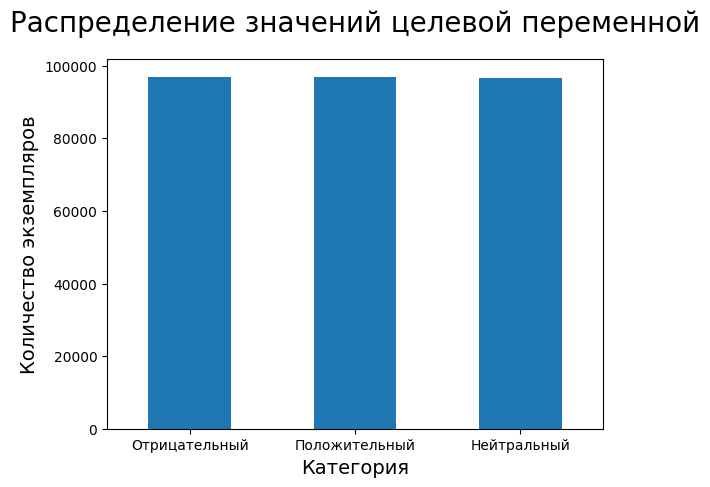

In [15]:
labels = {0:'Нейтральный', 1:'Положительный', 2:'Отрицательный'}

df_clean['label'].map(labels).value_counts().plot(kind='bar',
                                                rot = 0)
plt.title('Распределение значений целевой переменной', fontsize=20, pad=20)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество экземпляров', fontsize=14)
plt.show()

Статистика и диаграмма демонстрируют равномерное распределение значений по классам

#### Очистка и подготовка данных

In [16]:
import re
import nltk
from nltk.corpus import stopwords

In [17]:
df_clean['clear_text'] = df_clean['text'].str.lower()
df_clean.head(10)

,text,label,clear_text
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,"пальто красивое, но пришло с дырой в молнии. п..."
1,"Очень долго шел заказ,ждала к новому году,приш...",0,"очень долго шел заказ,ждала к новому году,приш..."
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,"могу сказать одно, брюки нормальные, но они бы..."
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,"доставка быстрая, меньше месяца. заказывали ра..."
4,Мне не очень понравилось это платье. Размер ...,0,мне не очень понравилось это платье. размер ...
5,"внешне качество хорошее, без запаха. силикон с...",0,"внешне качество хорошее, без запаха. силикон с..."
6,сшито не аккуратно. качество материала низкое....,0,сшито не аккуратно. качество материала низкое....
7,Кофта понравилась и доставлена была очень быст...,0,кофта понравилась и доставлена была очень быст...
8,Совершенно не понравилось так как совершенно н...,0,совершенно не понравилось так как совершенно н...
9,Разочарована. Покупала до этого в этом магазин...,0,разочарована. покупала до этого в этом магазин...


In [18]:
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    "]+", flags=re.UNICODE)

In [19]:
is_emoji = df_clean['clear_text'].str.contains(emoji_pattern, na=False, regex=True)
text_with_emoji = is_emoji.sum()

text_with_emoji

6228

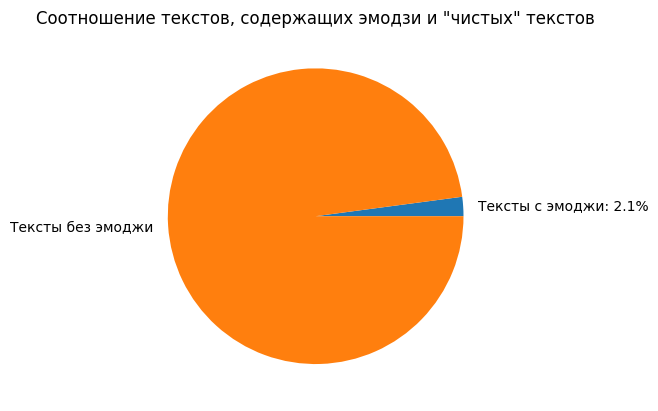

In [20]:
emoji_pie = [text_with_emoji, df_clean.shape[0]]
emoji_percent = text_with_emoji / df_clean.shape[0] * 100
labels = [f'Тексты с эмоджи: {emoji_percent:.1f}%', 'Тексты без эмоджи']
plt.pie(emoji_pie, labels=labels)
plt. title('Соотношение текстов, содержащих эмодзи и "чистых" текстов')
plt.show()

Могут быть значимы для темы определения тональности, не удаляем. Но для облегчения заменяем на тег. 

In [21]:
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    "]+", flags=re.UNICODE)
df_clean['clear_text'] = df_clean['clear_text'].str.replace(emoji_pattern, '[emoji]', regex=True)

Поиск мусора в данных

In [22]:
html_pattern = re.compile(r'<[^>]+>')
has_html = df_clean['text'].str.contains(html_pattern, na=False).sum()
print(f"Текстов с HTML тегами: {has_html} из {len(df_clean)}")

Текстов с HTML тегами: 63 из 290390


In [23]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
has_url = df_clean['text'].str.contains(url_pattern, na=False).sum()
print(f"Текстов с URL: {has_url} из {len(df_clean)}")

Текстов с URL: 573 из 290390


In [24]:
# Удаляем все символы кроме букв, цифр и []
special_pattern = re.compile(r'[^a-zа-яё0-9\s\[\]]')

In [25]:
# Очистка от HTML-тегов
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    html_pattern, ' ', regex=True)
# Очистка от URL
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    url_pattern, ' ', regex=True)

In [26]:
# Замена повторяющихся знаков препинания на тег эмоции
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'[!?]{2,}', ' [expression] ', regex=True) # повтор ! и ? -> эмоц.окраска
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'\.{2,}', ' [ellipsis] ', regex=True) # повтор точек -> многоточие
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'[\(\)]{2,}', ' [old_smile] ', regex=True) # повтор скобочек -> смайлик

In [27]:
# Удаление ненужных символов
# Переносы строк:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'[\n\r\t]', ' ', regex=True)
# Пунктуация:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    special_pattern, ' ', regex=True)
df_clean

,text,label,clear_text
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,пальто красивое но пришло с дырой в молнии п...
1,"Очень долго шел заказ,ждала к новому году,приш...",0,очень долго шел заказ ждала к новому году приш...
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,могу сказать одно брюки нормальные но они бы...
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,доставка быстрая меньше месяца заказывали ра...
4,Мне не очень понравилось это платье. Размер ...,0,мне не очень понравилось это платье размер ...
...,...,...,...
290453,Как всегда вкусный и свежий.,1,как всегда вкусный и свежий
290454,Обалденный!,1,обалденный
290455,"Достоинства:\nВкусно, лучшая паста\n\nНедостат...",1,достоинства вкусно лучшая паста недостатки ...
290456,"Достоинства:\nУвлажняет очень хорошо, и кожа к...",1,достоинства увлажняет очень хорошо и кожа ка...


In [28]:
from collections import Counter

# Собрать все слова
all_words = ' '.join(df_clean['clear_text']).split()
word_freq = Counter(all_words)

# Слова, встречающиеся 1-2 раза - вероятно опечатки
rare_words = {word for word, count in word_freq.items() if count <= 2}

def remove_rare(text):
    return ' '.join([w for w in text.split() if w not in rare_words])

df_clean['clear_text'] = df_clean['clear_text'].apply(remove_rare)
print(f"Удалили {len(rare_words)} редких слов")

Удалили 288273 редких слов


In [29]:
def fix_repeats(text):
    # "привеееет" → "привет"
    return re.sub(r'(.)\1\1+', r'\1\1', text)

df_clean['clear_text'] = df_clean['clear_text'].apply(fix_repeats)

In [30]:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'\s+',' ', regex=True).str.strip()

Проверка очистки

In [31]:
df_clean['text_lower'] = df_clean['text'].str.lower()
with pd.option_context('display.max_colwidth', None):
    display(df_clean[df_clean['text_lower'] != df_clean['clear_text']].head(10))

,text,label,clear_text,text_lower
0,"Пальто красивое, но пришло с дырой в молнии. Просила выслать такую же, но продавец настаивал на открытии спора.\r\nАли экспресс предложил либо вернуть товар либо компенсацию 659р.При возврате непонятно, кто оплачивает доставку, к тому же я хотела носить пальто. В ателье выяснилось, что вся молния обрезана, а сверху защита тонкой планкой.",0,пальто красивое но пришло с дырой в молнии просила выслать такую же но продавец настаивал на открытии спора али экспресс предложил либо вернуть товар либо компенсацию при возврате непонятно кто оплачивает доставку к тому же я хотела носить пальто в ателье выяснилось что вся молния обрезана а сверху защита тонкой планкой,"пальто красивое, но пришло с дырой в молнии. просила выслать такую же, но продавец настаивал на открытии спора.\r\nали экспресс предложил либо вернуть товар либо компенсацию 659р.при возврате непонятно, кто оплачивает доставку, к тому же я хотела носить пальто. в ателье выяснилось, что вся молния обрезана, а сверху защита тонкой планкой."
1,"Очень долго шел заказ,ждала к новому году,пришел, когда уже не нужен,разочарована.",0,очень долго шел заказ ждала к новому году пришел когда уже не нужен разочарована,"очень долго шел заказ,ждала к новому году,пришел, когда уже не нужен,разочарована."
2,"Могу сказать одно, брюки нормальные, НО они были порваны, и малы, заказывала второй раз, в этот раз заказала на размер больше, но размер пришёл меньше, деньги вернули за повреждение товара, за это огромное спасибо продавцу, а так брюки дошли за 14-15 дней... но порваны, очень жаль",0,могу сказать одно брюки нормальные но они были порваны и малы заказывала второй раз в этот раз заказала на размер больше но размер пришёл меньше деньги вернули за повреждение товара за это огромное спасибо продавцу а так брюки дошли за 14 15 дней [ellipsis] но порваны очень жаль,"могу сказать одно, брюки нормальные, но они были порваны, и малы, заказывала второй раз, в этот раз заказала на размер больше, но размер пришёл меньше, деньги вернули за повреждение товара, за это огромное спасибо продавцу, а так брюки дошли за 14-15 дней... но порваны, очень жаль"
3,"Доставка быстрая, меньше месяца. Заказывали размер L а пришёл s.еачество среднее, края не обработаны, но за такие деньги сойдёт",0,доставка быстрая меньше месяца заказывали размер l а пришёл s среднее края не обработаны но за такие деньги сойдёт,"доставка быстрая, меньше месяца. заказывали размер l а пришёл s.еачество среднее, края не обработаны, но за такие деньги сойдёт"
4,"Мне не очень понравилось это платье. Размер L подошёл, зелёного цвета, но смотрится не очень. Пришло быстро. Спасибо.",0,мне не очень понравилось это платье размер l подошёл зелёного цвета но смотрится не очень пришло быстро спасибо,"мне не очень понравилось это платье. размер l подошёл, зелёного цвета, но смотрится не очень. пришло быстро. спасибо."
5,"внешне качество хорошее, без запаха. силикон сначала приклеивается к груди хорошо и держит не плохо. через 10 минут начинают отходить края сверху и с боков, через полчаса форму груди уже не держит, сползает. С платьем в обтяжку носить можно думаю, а так придется поправлять постоянно. заказ пришел за 3 недели в Уфу.",0,внешне качество хорошее без запаха силикон сначала приклеивается к груди хорошо и держит не плохо через 10 минут начинают отходить края сверху и с боков через полчаса форму груди уже не держит сползает с платьем в обтяжку носить можно думаю а так придется поправлять постоянно заказ пришел за 3 недели в уфу,"внешне качество хорошее, без запаха. силикон сначала приклеивается к груди хорошо и держит не плохо. через 10 минут начинают отходить края сверху и с боков, через полчаса форму груди уже не держит, сползает. с платьем в обтяжку носить можно думаю, а так придется поправлять постоянно. заказ пришел за 3 недели в уфу."
6,"сшито не аккуратно. качество материала низкое. торчат нитки. по размеру взяли XL и не прогадали, хотя по линейке продавца рекомендован был размер L",0,сшито не а

In [32]:
df_clean = df_clean.drop(columns='text_lower')
df_clean

,text,label,clear_text
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,пальто красивое но пришло с дырой в молнии про...
1,"Очень долго шел заказ,ждала к новому году,приш...",0,очень долго шел заказ ждала к новому году приш...
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,могу сказать одно брюки нормальные но они были...
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,доставка быстрая меньше месяца заказывали разм...
4,Мне не очень понравилось это платье. Размер ...,0,мне не очень понравилось это платье размер l п...
...,...,...,...
290453,Как всегда вкусный и свежий.,1,как всегда вкусный и свежий
290454,Обалденный!,1,обалденный
290455,"Достоинства:\nВкусно, лучшая паста\n\nНедостат...",1,достоинства вкусно лучшая паста недостатки дор...
290456,"Достоинства:\nУвлажняет очень хорошо, и кожа к...",1,достоинства увлажняет очень хорошо и кожа как ...


In [33]:
# Посмотреть примеры удалённых слов
rare_words = list(rare_words)[:50]  # первые 50
print("Примеры удалённых слов:")
for word in rare_words[:20]:
    print(f"  '{word}'")

Примеры удалённых слов:
  'эксплуатанты'
  'безрыбьи'
  'ганбастере'
  'повторившийся'
  'янгер'
  'дюмы'
  'лавкрафтщину'
  'прострела'
  'zzap'
  'полудник'
  'детплощадка'
  'матб'
  'собакисон'
  'подпрыгиваешь'
  'ковчегом'
  'вкладывай'
  'троцком'
  'айсам'
  'сотонизм'
  'арут'


In [34]:
# Узнать уникальных слов
all_words = ' '.join(df_clean['clear_text']).split()
unique_words = len(set(all_words))
print(f"Уникальных слов: {unique_words}")

Уникальных слов: 163760


In [35]:
all_words_list = ' '.join(df_clean['clear_text']).split()
total_words = len(all_words_list)
print(f"Всего слов в датасете (с повторами): {total_words:,}")
print(f"Всего уникальных слов: {len(set(all_words_list)):,}")
print(f"Средняя длина текста: {total_words / len(df_clean):.1f} слов")

Всего слов в датасете (с повторами): 14,922,068
Всего уникальных слов: 163,760
Средняя длина текста: 51.4 слов


### Токенизация